# Author: Ashwini Math

DSBA TASK - 1

# Problem statement : Predict the percentage of a student based on the no. of study hours.

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [25]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [26]:
import os
os.getcwd()

'C:\\Users\\HP\\Downloads'

In [27]:
# Reading the Data 
df=pd.read_excel(r'C:\Users\HP\Downloads\Student_scores.xlsx') 

In [28]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [29]:
# Check if there are any null value in the Dataset
df.isnull == True

False

# We can now visualize our data, since there are no null values.

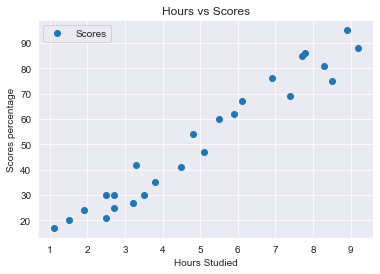

In [30]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores percentage')  
plt.show()

From the above plot we can clearly see that there is strong correlation between the two variables.

# Preparing the data

Regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable.

In [32]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training dataset

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [34]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


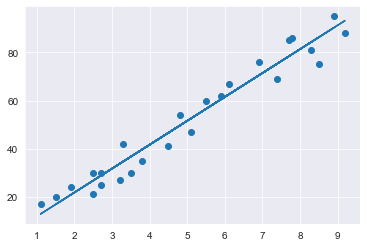

In [35]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [36]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [37]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [59]:
x = np.array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])
y = np.array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86])

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

print(lr.predict([[9.25]]))

[92.90985477]


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. 

In [60]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# The End